<a href="https://colab.research.google.com/github/Danangellotti/Ciencia_de_Datos_UGR_24/blob/main/Copia_de_Semana_07_Practica_07_Resuelta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 007

Opencv.

# Ejercicio 01

Descargar la siguiente [imagen](https://drive.google.com/file/d/125-ObI3n4zEOj3zu0Nz5jgce2Se5DZ11/view?usp=share_link), mostrarla y mostrar su tamaño de pixels (width, height).

El id de la imagen es: 125-ObI3n4zEOj3zu0Nz5jgce2Se5DZ11

In [ ]:
import cv2 as cv
import urllib.request
import numpy as np
# librería para poder mostrar las imágenes en colab
from google.colab.patches import cv2_imshow

In [ ]:
# En este caso vamos a descargala desde un drive y la mostramos
# La imagen queda almacenada en /content

# url de la imagen
url = 'https://drive.google.com/uc?id=125-ObI3n4zEOj3zu0Nz5jgce2Se5DZ11'
# nombre del archivo
filename = "tiger.jpg"
# realizamos el wget para obtener la imagen
!wget {url} -O {filename}
# leemos la imagen con opencv, el segundo argumento
# esta relacionado a como quiere leer la imagen. Ver el link para mas tipos
# https://docs.opencv.org/3.4/d8/d6a/group__imgcodecs__flags.html#ga61d9b0126a3e57d9277ac48327799c80
# este segundo argumento está relacionado a si la quiero obtener en escala de grises
# a color, etc.
img = cv.imread(filename, cv.IMREAD_UNCHANGED)
# mostramos la imagen
cv2_imshow(img)

In [ ]:
print(f"La imagen tiene un width igual a {img.shape[1]} y un height igual a {img.shape[0]}")

La imagen tiene un width igual a 2292 y un height igual a 1500


# Ejercicio 02

Recortar la sección de la cara y aplicar una función negativa para la región. Mostrar la imagen completa con la región modificada.

>https://yangcha.github.io/iview/iview.html


In [ ]:
img_2 = img.copy()
#     y       x
img_2[150:800,600:1300,:] = ~img_2[150:800,600:1300,:]
cv2_imshow(img_2)


## Ejercicio 03

Recortar la imagen original haciendo que quede una imagen cuadrada de 1500x1500.
Para recortar se debe tomar el centro de la imagen.

In [ ]:
img_3 = img.copy()
# obtengo los centros
middle_y = img_3.shape[1]//2
middle_x = img_3.shape[0]//2
#           y, no lo toco
#             x, tomo el centro de 'y' y le resto 'x'
img_3 = img[:,middle_y-middle_x:middle_y+middle_x,:]
print(img_3.shape)
cv2_imshow(img_3)

# Ejercicio 04

Tomar la imagen del ejercicio 3, cortarla en 4 sub imágenes y reensamblarla de la siguiente forma.

Imagen original

| | |
| --- | --- |
| arriba izquierda | arriba derecha |
| abajo izquierda | abajo derecha |


Imagen ensamblada

| | |
| --- | --- |
| abajo derecha | abajo izquierda |
| arriba derecha | arriba izquierda |



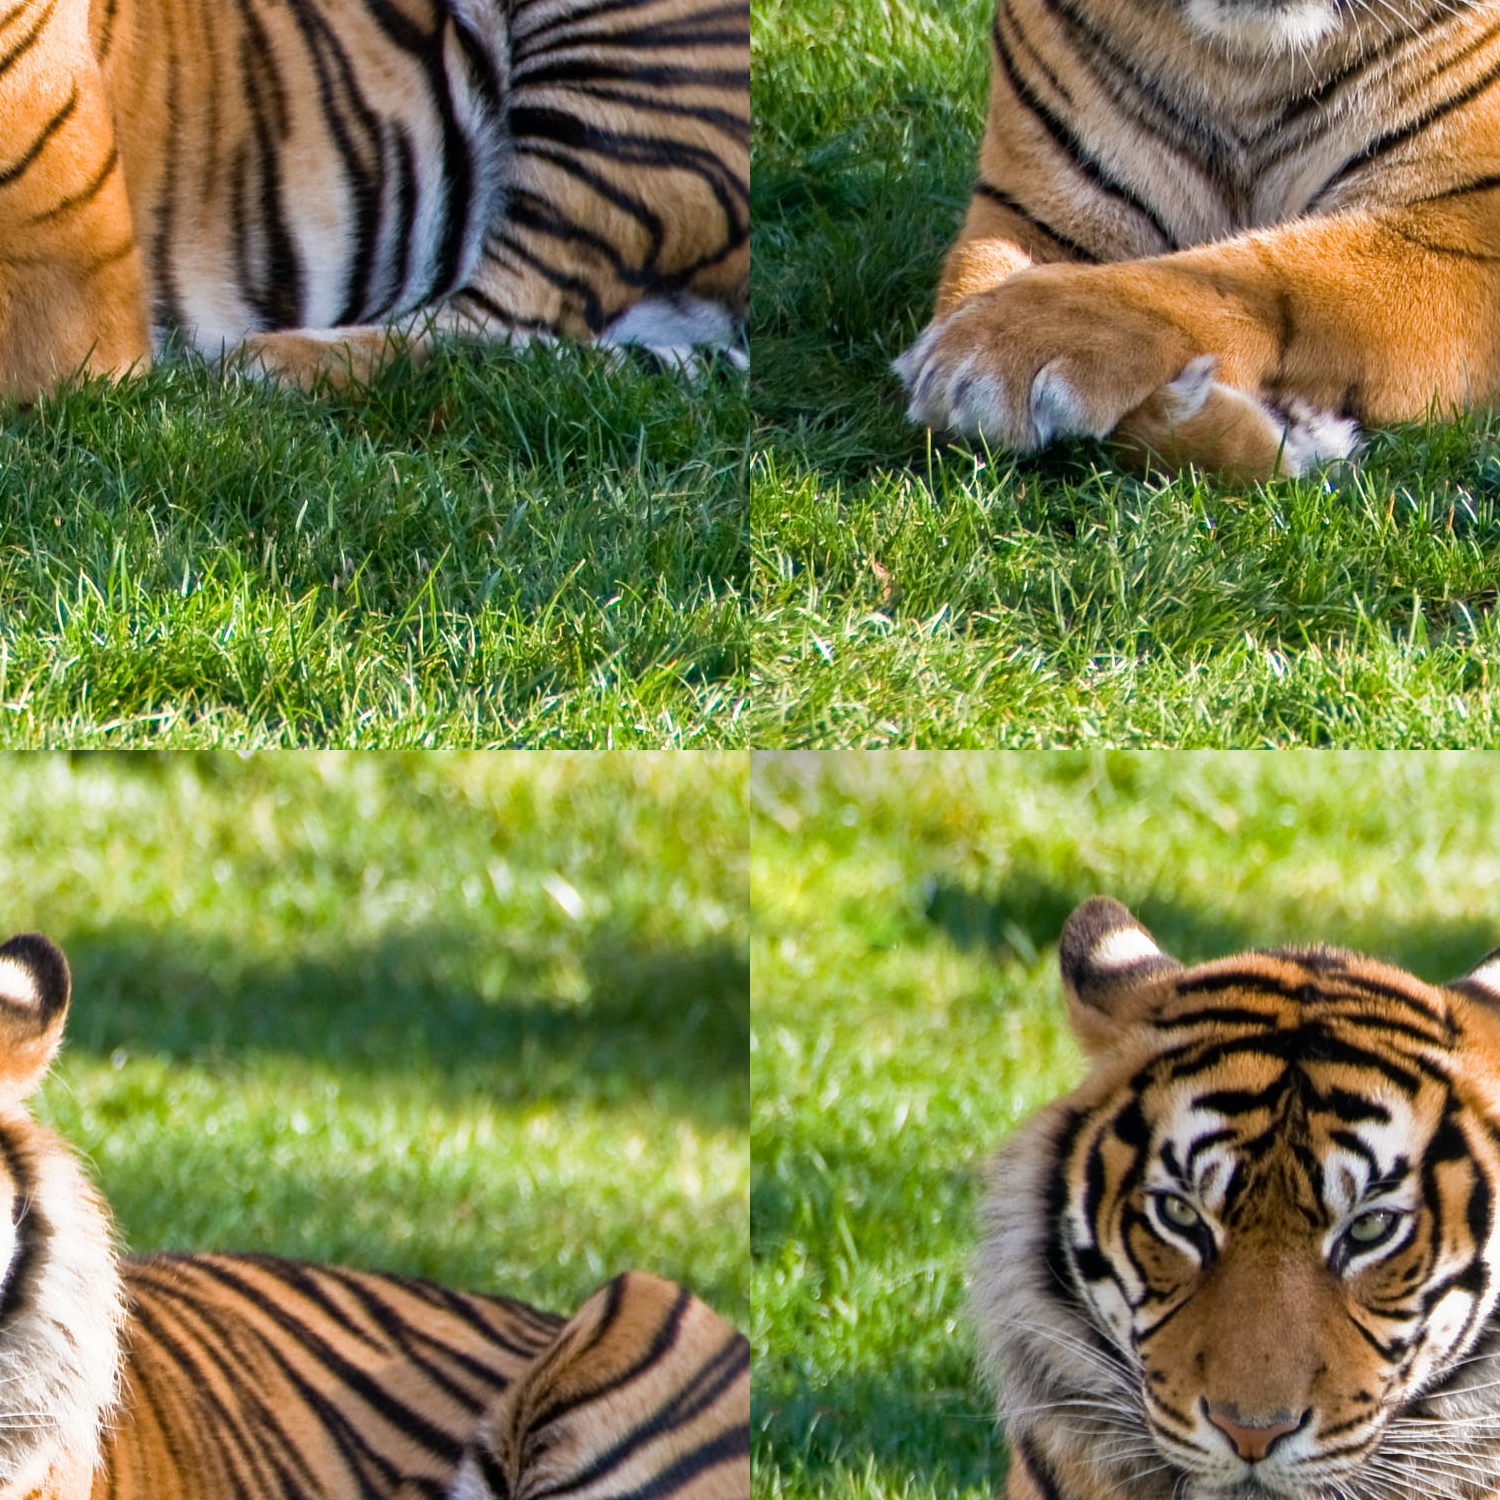

In [ ]:
img_4 = img_3.copy()
# obtengo las mitades
middle_y_4 = img_4.shape[1]//2
middle_x_4 = img_4.shape[0]//2
# obtengo :750,:750
upper_left = img_4[:middle_y_4,:middle_x_4,:]
# obtengo :750,750:
upper_rigth = img_4[:middle_x_4,middle_y_4:,:]
# obtengo 750:,:750
bottom_left = img_4[middle_y_4:,:middle_x_4,:]
# obtengo 750:,750:
bottom_rigth = img_4[middle_x_4:,middle_y_4:,:]
# concateno la parte superior con las matrices inferiores
upper = np.concatenate([bottom_rigth, bottom_left], axis=1)
# concateno la parte inferior con las matrices superiores
bottom = np.concatenate([upper_rigth, upper_left], axis=1)
# concateno todas las matrices
concat = np.concatenate([upper, bottom], axis=0)

cv2_imshow(concat)

# Ejercicio 05

Tomar la imagen original y generar la transparencia a partir del compomente rojo.

Utilizar un threshold de 100, un maxval de 255, y un tipo THRESH_BINARY.


In [ ]:
img5 = img.copy()

# Convertimos la imagen a HSV y tomamos el componente V o valor
green = img[...,1]

# Aplicamos un threshold sobre el componente V a 100 para crear el componente A o alpha
_, alpha = cv.threshold(green, 100, 255, cv.THRESH_BINARY)

# Agregamos el componente alpha a la imagen
img5 = np.dstack((img5,alpha))

cv2_imshow(img5)